   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0

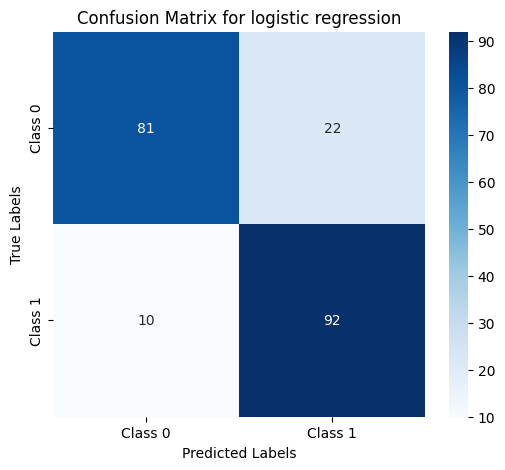





accuracy due to random forest is :  100.0
recall due to random forest is :  100.0
precision due to random forest is :  100.0


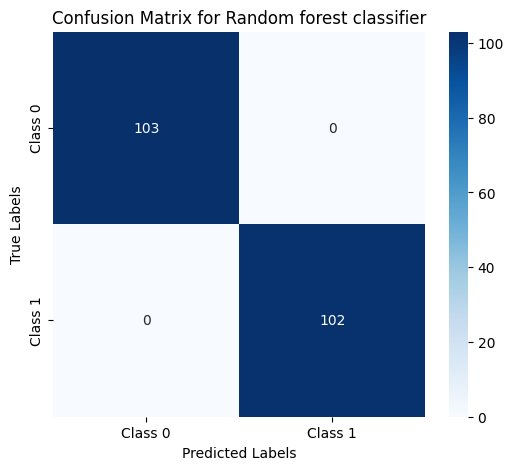

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/sample_data/heart.csv")

print(df.head())
###preprocessing
# Filling missing values with the mean or mode (corrected code)
df['age'] = df['age'].fillna(df['age'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['cp'] = df['cp'].fillna(df['cp'].mode()[0])
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['thalach'] = df['thalach'].fillna(df['thalach'].mean())
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])


categorical_data=['sex','cp','fbs','restecg','exang','slope','ca','thal']
continuous_data=['age','trestbps','chol','thalach','oldpeak']

scaler=StandardScaler()

df[continuous_data]=scaler.fit_transform(df[continuous_data])

print('\n')
print(df.head())

### splitting
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train , x_test , y_train , y_test=train_test_split(x,y, test_size=0.2 , random_state=48)

###training model
model=LogisticRegression()
model.fit(x_train , y_train)

###testing model

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test , y_pred)
print("\n")
print("Accuracy using logistic regression is : ",accuracy*100)
print("Recall using logistic regression is : ",recall*100)
print("Precision using logistic regression is : ",precision*100)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for logistic regression')
plt.show()
print('\n')
###Random forest
model2=RandomForestClassifier(n_estimators=50 , random_state=42)
model2.fit(x_train,y_train)

y_pred2=model2.predict(x_test)
accuracy2=accuracy_score(y_test,y_pred2)
recall2=recall_score(y_test,y_pred2)
precision2=precision_score(y_test , y_pred2)
print("\n")
print("accuracy due to random forest is : ",accuracy2*100)
print("recall due to random forest is : ",recall2*100)
print("precision due to random forest is : ",precision2*100)

cm=confusion_matrix(y_test , y_pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random forest classifier')
plt.show()


In [56]:
data={
    'age':[34],
    'sex':[1],
    'cp':[0],
    'trestbps':[138],
    'chol':[175],
    'fbs':[1],
    'restecg':[1],
    'thalach':[124],
    'exang':[1],
    'oldpeak':[3.1],
    'slope':[2],
    'ca':[3],
    'thal':[3]
}
input_df = pd.DataFrame(data)
input_df[continuous_data] = scaler.transform(input_df[continuous_data])
y_pred3 = model.predict(input_df)
print("Prediction using logistic regression:", y_pred3[0])
y_pred4 = model2.predict(input_df)
print("Prediction using Random forest classifier is : ",y_pred4[0])

Prediction using logistic regression: 0
Prediction using Random forest classifier is :  0
